# Welcome to the ASHRAE - Great Energy Predictor Competition
This notebook is a starter code for all beginners and easy to understand.

First we will do a simple analyis, have a look on the data and handle missing data. After that we create new features. We also use categorical feature encoding techniques, compare 
https://www.kaggle.com/drcapa/categorical-feature-encoding-challenge-xgb


# Load Libraries
We need the standard python libraries an some libraries of sklearn.

In [4]:
import numpy as np
import pandas as pd
import scipy.special
import matplotlib.pyplot as plt
import os
print(os.listdir("../input/"))

['building_metadata.csv', 'sample_submission.csv.zip', 'test.csv.zip', 'train.csv.zip', 'weather_test.csv.zip', 'weather_train.csv.zip']


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load Data

In [6]:
path_in = '../input/'

In [9]:
train_data = pd.read_csv(path_in+'train.csv')
test_data = pd.read_csv(path_in+'test.csv')
samp_subm = pd.read_csv(path_in+'sample_submission.csv')
train_weather = pd.read_csv(path_in+'weather_train.csv')
test_weather = pd.read_csv(path_in+'weather_test.csv')
building_data = pd.read_csv(path_in+'building_metadata.csv')

# Help functions

In [10]:
def plot_bar(data, name):
    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)
    data_label = data[name].value_counts()
    dict_train = dict(zip(data_label.keys(), ((data_label.sort_index())).tolist()))
    names = list(dict_train.keys())
    values = list(dict_train.values())
    plt.bar(names, values)
    ax.set_xticklabels(names, rotation=45)
    plt.grid()
    plt.show()

# Simple Analysis

## Have a look on the data
* In the next step we create new features based on the timestamp.
* We have do deal with missing values on the weather data.

In [11]:
train_data.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [12]:
train_weather.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [13]:
building_data.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


## Missing Data
* train_data: no missing values
* test_data: no missing values
* train_weather: there are some missing values we have to deal with
* test_weather: there are some missing values we have to deal with
* builing_data: there are missing values for the features year_build and floor_count

The missing data are numerical values. So for the first step we can use am simple imputer of the sklearn library.

In [14]:
cols_with_missing_train_data = [col for col in train_data.columns if train_data[col].isnull().any()]
cols_with_missing_test_data = [col for col in test_data.columns if test_data[col].isnull().any()]
cols_with_missing_train_weather = [col for col in train_weather.columns if train_weather[col].isnull().any()]
cols_with_missing_test_weather = [col for col in test_weather.columns if test_weather[col].isnull().any()]
cols_with_missing_building = [col for col in building_data.columns if building_data[col].isnull().any()]

In [2]:
print(cols_with_missing_train_data)
print(cols_with_missing_test_data)
print(cols_with_missing_train_weather)
print(cols_with_missing_test_weather)
print(cols_with_missing_building)

NameError: name 'cols_with_missing_train_data' is not defined

# Feature engineering

## Impute Data
For the first we can you use the most_frequent function.

In [3]:
imp_most = SimpleImputer(strategy='most_frequent')
train_weather[cols_with_missing_train_weather] = imp_most.fit_transform(train_weather[cols_with_missing_train_weather])
test_weather[cols_with_missing_test_weather] = imp_most.fit_transform(test_weather[cols_with_missing_test_weather])
building_data[cols_with_missing_building] = imp_most.fit_transform(building_data[cols_with_missing_building])

NameError: name 'SimpleImputer' is not defined

## Create new features
Based on the timestamp we create new features for the month, the weekday the hour and the year. These are cyclic features.

In [17]:
train_data['timestamp'] = pd.to_datetime(train_data['timestamp'])
train_data['month'] = train_data['timestamp'].dt.month
train_data['weekday'] = train_data['timestamp'].dt.day
train_data['year'] = train_data['timestamp'].dt.year.astype(str)
train_data['hour'] = train_data['timestamp'].dt.hour
test_data['timestamp'] = pd.to_datetime(test_data['timestamp'])
test_data['month'] = test_data['timestamp'].dt.month
test_data['weekday'] = test_data['timestamp'].dt.day
test_data['year'] = test_data['timestamp'].dt.year.astype(str)
test_data['hour'] = test_data['timestamp'].dt.hour

In [18]:
train_data.head()

,building_id,meter,timestamp,meter_reading,month,weekday,year,hour
0,0,0,2016-01-01,0.0,1,1,2016,0
1,1,0,2016-01-01,0.0,1,1,2016,0
2,2,0,2016-01-01,0.0,1,1,2016,0
3,3,0,2016-01-01,0.0,1,1,2016,0
4,4,0,2016-01-01,0.0,1,1,2016,0


## Encoding
There is a greate encoding competition: https://www.kaggle.com/drcapa/categorical-feature-encoding-challenge-xgb
### Building data
The feature primary_use is a categorical feature with 16 categories. For the first we use a simple mapping.

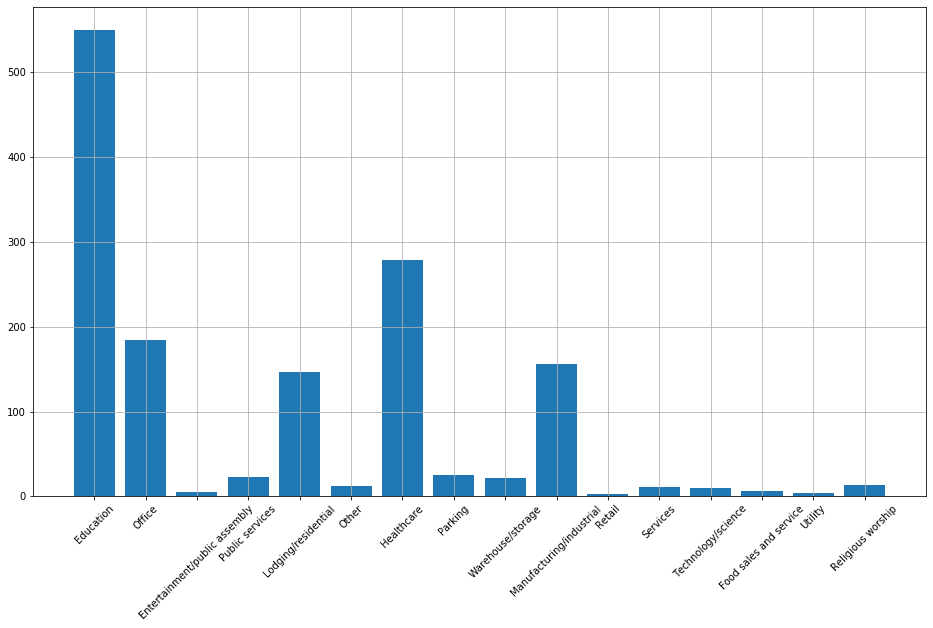

In [19]:
plot_bar(building_data, 'primary_use')

In [20]:
map_use = dict(zip(building_data['primary_use'].value_counts().sort_index().keys(),
                     range(1, len(building_data['primary_use'].value_counts())+1)))

In [21]:
building_data['primary_use'] = building_data['primary_use'].replace(map_use)

### Cyclic features
We create the features month, weekday and hour which are cyclic.

In [22]:
features_cyc = ['month', 'weekday', 'hour']

# Intersect data
We have to extend the train data with the informations about the weather and the buildings.

# Define train and test data

# Split train and val data

# Create Model

# Predict test data

# Write output for submission